<a href="https://colab.research.google.com/github/ycho1908/Next-Gen-TV-Show-Recommendations/blob/main/DirecTV_Team1B_AI_Studio_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Milestone 2: Data preprocessing

### Part 1 (Evelyn): Clean the dataset (handle missing values, remove duplicates, etc.)

In [2]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [3]:
import pandas as pd
df = pd.read_csv('/content/drive/MyDrive/Team_DirecTV_1B/TMDB_tv_dataset_v3.csv')
df = df.drop(columns=['id', 'poster_path','languages'])

# drop if 90% of data missing
df.dropna(axis=1, thresh = int(0.1*df.shape[0]), inplace=True)

# drop if 95% of data are the same
for col in df.columns:
    most_frequent = df[col].value_counts(normalize=True).max()
    if most_frequent >= 0.95:
        df = df.drop(columns=[col])

dropped 3 columns that didn't have information that would be benificial in finding how popular a TV show would be. Also dropped columns where most od the data was missing or most of the data was the same.

In [4]:
print("First 5 rows of the dataset:")
# print(df.head())
df.head()

First 5 rows of the dataset:


,name,number_of_seasons,number_of_episodes,original_language,vote_count,vote_average,overview,backdrop_path,first_air_date,last_air_date,...,type,status,genres,created_by,networks,origin_country,spoken_languages,production_companies,production_countries,episode_run_time
0,Game of Thrones,8,73,en,21857,8.442,Seven noble families fight for control of the ...,/2OMB0ynKlyIenMJWI2Dy9IWT4c.jpg,2011-04-17,2019-05-19,...,Scripted,Ended,"Sci-Fi & Fantasy, Drama, Action & Adventure","David Benioff, D.B. Weiss",HBO,US,English,"Revolution Sun Studios, Television 360, Genera...","United Kingdom, United States of America",0
1,Money Heist,3,41,es,17836,8.257,"To carry out the biggest heist in history, a m...",/gFZriCkpJYsApPZEF3jhxL4yLzG.jpg,2017-05-02,2021-12-03,...,Scripted,Ended,"Crime, Drama",Álex Pina,"Netflix, Antena 3",ES,Español,Vancouver Media,Spain,70
2,Stranger Things,4,34,en,16161,8.624,"When a young boy vanishes, a small town uncove...",/2MaumbgBlW1NoPo3ZJO38A6v7OS.jpg,2016-07-15,2022-07-01,...,Scripted,Returning Series,"Drama, Sci-Fi & Fantasy, Mystery","Matt Duffer, Ross Duffer",Netflix,US,English,"21 Laps Entertainment, Monkey Massacre Product...",United States of America,0
3,The Walking Dead,11,177,en,15432,8.121,Sheriff's deputy Rick Grimes awakens from a co...,/x4salpjB11umlUOltfNvSSrjSXm.jpg,2010-10-31,2022-11-20,...,Scripted,Ended,"Action & Adventure, Drama, Sci-Fi & Fantasy",Frank Darabont,AMC,US,English,"AMC Studios, Circle of Confusion, Valhalla Mot...",United States of America,42
4,Lucifer,6,93,en,13870,8.486,"Bored and unhappy as the Lord of Hell, Lucifer...",/aDBRtunw49UF4XmqfyNuD9nlYIu.jpg,2016-01-25,2021-09-10,...,Scripted,Ended,"Crime, Sci-Fi & Fantasy",Tom Kapinos,"FOX, Netflix",US,English,"Warner Bros. Television, DC Entertainment, Jer...",United States of America,45


In [5]:
print("Shape of the dataset:")
print(df.shape) #Get the shape of the dataset (number of rows and columns)

Shape of the dataset:
(168639, 24)


In [6]:
print("Number of missing values:")
print(df.isna().sum())

# fill the missing values with the mean if it is numeric
numeric_columns = df.select_dtypes(include=['number']).columns
df[numeric_columns] = df[numeric_columns].fillna(df[numeric_columns].mean())

# fill the missing values with most frequent value if it is not numeric
# referred to: https://www.analyticsvidhya.com/blog/2021/04/how-to-handle-missing-values-of-categorical-variables/
non_numeric_columns = df.select_dtypes(exclude=['number']).columns
for c in non_numeric_columns:
    df[c] = df[c].fillna(df[c].mode()[0]) # gets the most frequent value in the mode (frequent values)

Number of missing values:
name                         5
number_of_seasons            0
number_of_episodes           0
original_language            0
vote_count                   0
vote_average                 0
overview                 75306
backdrop_path            90859
first_air_date           31736
last_air_date            29904
homepage                117641
in_production                0
original_name                5
popularity                   0
type                         0
status                       0
genres                   68926
created_by              132143
networks                 71050
origin_country           31030
spoken_languages         59359
production_companies    109297
production_countries     91128
episode_run_time             0
dtype: int64


Checked to see how many missing values all columns had and replaced with mean if numerical, or the most frequent value if not numeric

In [7]:
print("Number of missing values:")
print(df.isna().sum())

Number of missing values:
name                    0
number_of_seasons       0
number_of_episodes      0
original_language       0
vote_count              0
vote_average            0
overview                0
backdrop_path           0
first_air_date          0
last_air_date           0
homepage                0
in_production           0
original_name           0
popularity              0
type                    0
status                  0
genres                  0
created_by              0
networks                0
origin_country          0
spoken_languages        0
production_companies    0
production_countries    0
episode_run_time        0
dtype: int64


In [8]:
df = df.drop_duplicates() # removing duplicates

### Part 2 (Sharon): Encode categorical data and normalize numeric data

In [9]:
# simplify complex categorical columns for columns like genres, created_by, networks (columns that contain multiple values, simplify them by extracting the first value appropriate)
df['genres'] = df['genres'].apply(lambda x: x.split(',')[0] if isinstance(x, str) else x)
df['created_by'] = df['created_by'].apply(lambda x: x.split(',')[0] if isinstance(x, str) else x)
# df['languages'] = df['languages'].apply(lambda x: x.split(',')[0] if isinstance(x, str) else x) # removed languages column
df['spoken_languages'] = df['spoken_languages'].apply(lambda x: x.split(',')[0] if isinstance(x, str) else x)
df['production_companies'] = df['production_companies'].apply(lambda x: x.split(',')[0] if isinstance(x, str) else x)
df['production_countries'] = df['production_countries'].apply(lambda x: x.split(',')[0] if isinstance(x, str) else x)

In [10]:
# One-hot encoding for simpler categorical columns
df_encoded = pd.get_dummies(df, columns=['original_language', 'networks', 'origin_country', 'genres'], drop_first=True)

In [11]:
# Normalize numeric columns using Min-Max Scaling
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
numeric_columns = ['number_of_seasons', 'number_of_episodes', 'vote_count', 'vote_average', 'episode_run_time']
df_encoded[numeric_columns] = scaler.fit_transform(df_encoded[numeric_columns])

In [ ]:
# Convert binary columns (True/False to 1/0)
# df_encoded['adult'] = df_encoded['adult'].astype(int)

In [12]:
df_encoded.head()

,name,number_of_seasons,number_of_episodes,vote_count,vote_average,overview,backdrop_path,first_air_date,last_air_date,homepage,...,genres_Musical,genres_Mystery,genres_News,genres_Reality,genres_Romance,genres_Sci-Fi & Fantasy,genres_Soap,genres_Talk,genres_War & Politics,genres_Western
0,Game of Thrones,0.033333,0.003503,1.000000,0.8442,Seven noble families fight for control of the ...,/2OMB0ynKlyIenMJWI2Dy9IWT4c.jpg,2011-04-17,2019-05-19,http://www.hbo.com/game-of-thrones,...,False,False,False,False,False,True,False,False,False,False
1,Money Heist,0.012500,0.001967,0.816031,0.8257,"To carry out the biggest heist in history, a m...",/gFZriCkpJYsApPZEF3jhxL4yLzG.jpg,2017-05-02,2021-12-03,https://www.netflix.com/title/80192098,...,False,False,False,False,False,False,False,False,False,False
2,Stranger Things,0.016667,0.001632,0.739397,0.8624,"When a young boy vanishes, a small town uncove...",/2MaumbgBlW1NoPo3ZJO38A6v7OS.jpg,2016-07-15,2022-07-01,https://www.netflix.com/title/80057281,...,False,False,False,False,False,False,False,False,False,False
3,The Walking Dead,0.045833,0.008494,0.706044,0.8121,Sheriff's deputy Rick Grimes awakens from a co...,/x4salpjB11umlUOltfNvSSrjSXm.jpg,2010-10-31,2022-11-20,http://www.amc.com/shows/the-walking-dead--100...,...,False,False,False,False,False,False,False,False,False,False
4,Lucifer,0.025000,0.004463,0.634579,0.8486,"Bored and unhappy as the Lord of Hell, Lucifer...",/aDBRtunw49UF4XmqfyNuD9nlYIu.jpg,2016-01-25,2021-09-10,https://www.netflix.com/title/80057918,...,False,False,False,False,False,False,False,False,False,False


### Part 3 (Hearty): Preprocess text data

### Examine the text data

In [ ]:
pd.set_option('display.max_colwidth', None)

print(df['overview'].head(10))

0                                                                                                                                                                                Seven noble families fight for control of the mythical land of Westeros. Friction between the houses leads to full-scale war. All while a very ancient evil awakens in the farthest north. Amidst the war, a neglected military order of misfits, the Night's Watch, is all that stands between the realms of men and icy horrors beyond.
1    To carry out the biggest heist in history, a mysterious man called The Professor recruits a band of eight robbers who have a single characteristic: none of them has anything to lose. Five months of seclusion - memorizing every step, every detail, every probability - culminate in eleven days locked up in the National Coinage and Stamp Factory of Spain, surrounded by police forces and with dozens of hostages in their power, to find out whether their suicide wager will lead to everythin

In [ ]:
print(df_encoded['overview'].tail(10))

168628                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                           What ok what ok what ok hi what ok hi what ok
168630                                                                                                                                                                                                                                                                                                   

Note: some rows (especially the latter rows) have reviews that are not descriptive. considerations: distinct count of words. words <= 3 or 4

### Preprocess the text data. Remove special characters, numbers, punctuation, and extra white space.

In [ ]:
import re

def clean_text(text):
    text = text.lower()
    text = re.sub(r'\n+', ' ', text) # remove new line characters (\n and multiple \n)
    text = re.sub(r'[^a-z\s]', '', text)  # remove special characters, numbers, and punctuation
    text = re.sub(r'\s+', ' ', text).strip() # remove extra whitespace
    return text

df_encoded['cleaned_overview'] = df_encoded['overview'].apply(lambda x: clean_text(str(x)))
print(df_encoded['cleaned_overview'].tail(10))

In [ ]:
def valid_overview(text):
    words = text.split()
    if len(words) >= 3 and len(set(words)) > 3:
        return True
    return False

df_filtered = df_encoded[df_encoded['cleaned_overview'].apply(lambda x: valid_overview(x))]
print(df_filtered['cleaned_overview'].tail(10))

Note: is text processing is too extreme?
ask TA or advisor to what extent we should clean text data

### Stop word removal (can keep for LLM)

In [ ]:
import nltk
from nltk.corpus import stopwords

nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

def remove_stopwords(text):
    # split text into words, remove stop words, and join them back
    words = text.split()
    words = [word for word in words if word not in stop_words]
    return ' '.join(words)

df_encoded['cleaned_overview'] = df_encoded['cleaned_overview'].apply(remove_stopwords)
print(df_encoded['cleaned_overview'].tail(10))

# Milestone 3: Exploratory Data Analysis


In [ ]:
pd.options.display.max_columns = None
print(df.columns.tolist())

['name', 'number_of_seasons', 'number_of_episodes', 'original_language', 'vote_count', 'vote_average', 'overview', 'backdrop_path', 'first_air_date', 'last_air_date', 'homepage', 'in_production', 'original_name', 'popularity', 'type', 'status', 'genres', 'created_by', 'networks', 'origin_country', 'spoken_languages', 'production_companies', 'production_countries', 'episode_run_time']


Based on the columns provided in the dataset, some features are likely to have a stronger impact on predicting popularity:

### High-impact Features:
1. **`vote_count`** and **`vote_average`**: These directly reflect how many people have rated the show and its overall reception, which are strong indicators of popularity.
2. **`number_of_seasons`** and **`number_of_episodes`**: Longer-running shows may indicate sustained popularity and viewer interest, making these useful features.
3. **`first_air_date`** and **`last_air_date`**: The timing of a show's release could be crucial, as newer or trending shows may receive more attention, especially if they're actively in production.
4. **`genres`**: Different genres may attract different levels of viewership, so encoding these into categories could help predict popularity (e.g., action shows might attract more viewers).
5. **`networks`**: Shows produced or aired by popular networks are likely to have higher visibility and, thus, popularity.
6. **`languages`** and **`original_language`**: Language could affect global viewership, and shows in widely spoken languages may attract more viewers.
7. **`status`** (e.g., ongoing, ended): Current shows might attract more attention than ones that have ended.
8. **`episode_run_time`**: Shorter or longer episodes could influence how bingeable or appealing a show is, affecting its popularity.

### Moderate-impact Features:
1. **`production_companies`** and **`production_countries`**: High-profile production companies or countries known for popular media content could boost a show's visibility and popularity.
2. **`adult`**: Shows with adult content might appeal to a different demographic but could also limit audience size.
3. **`type`** (e.g., miniseries, regular series): This could influence viewership, as certain formats might be more popular.
4. **`overview`**: Extracted themes or sentiment from this column can enhance the model by identifying shows with appealing content.

### Lesser-impact Features:
- **`poster_path`, `backdrop_path`, `homepage`**: These are more visual or web-based metadata and might not directly influence popularity unless you use them to infer a show's marketing strength.
- **`created_by`, `spoken_languages`, `origin_country`**: These features might have a lower direct impact but could add context or marginally affect popularity.

### Part 1 (Evelyn / Hearty): Perform detailed EDA to identify key patterns and correlations

### Understanding Data Types
Analyze the data types of all the columns.

In [ ]:
print(df.dtypes)

name                     object
number_of_seasons         int64
number_of_episodes        int64
original_language        object
vote_count                int64
vote_average            float64
overview                 object
backdrop_path            object
first_air_date           object
last_air_date            object
homepage                 object
in_production              bool
original_name            object
popularity              float64
type                     object
status                   object
genres                   object
created_by               object
networks                 object
origin_country           object
spoken_languages         object
production_companies     object
production_countries     object
episode_run_time          int64
dtype: object


Change datatypes of some columns:

*   first_air_date: object --> datetime
*   genres: object --> list
*   last_air_date: object --> datetime
*   episode_run_time: object --> int
*   popularity: object --> float
*   vote_average: object --> float
*   vote_count: object --> int
*   in_production: object --> bool
*   origin_country: object --> string or list of strings
*   spoken_languages: object --> string or list of strings
*   production_countries: object --> string or list of strings









In [ ]:
import ast

# convert 'first_air_date' to datetime
df['first_air_date'] = pd.to_datetime(df['first_air_date'], errors='coerce')

# convert 'last_air_date' to datetime
df['last_air_date'] = pd.to_datetime(df['last_air_date'], errors='coerce')

# convert 'episode_run_time' to int
df['episode_run_time'] = pd.to_numeric(df['episode_run_time'], errors='coerce')

# convert 'popularity' to float
df['popularity'] = pd.to_numeric(df['popularity'], errors='coerce')

# convert 'vote_average' to float
df['vote_average'] = pd.to_numeric(df['vote_average'], errors='coerce')

# convert 'vote_count' to int
df['vote_count'] = pd.to_numeric(df['vote_count'], errors='coerce')

# convert 'in_production' to boolean
df['in_production'] = df['in_production'].astype('bool')

# Convert columns to string representation
df['origin_country'] = df['origin_country'].astype(str)
df['spoken_languages'] = df['spoken_languages'].astype(str)
df['production_countries'] = df['production_countries'].astype(str)

# convert 'genres' from a string representation of a list to an actual list

def safe_genres_parser(val):
    try:
        # if it's already in list format as a string, evaluate it
        if isinstance(val, str) and val.startswith('['):
            return ast.literal_eval(val)
        # if it's a single genre (just a string), return it as a list
        elif isinstance(val, str):
            return [val]
        return val  # if it's already a list or some other format, return as is
    except (ValueError, SyntaxError):
        # if there's an error parsing, return None or the original value based on your preference
        return None

df['genres'] = df['genres'].apply(lambda x: safe_genres_parser(x))

After successful conversion, pandas will still state the column is of object data type. This is because in pandas, a column with mixed types (like lists, strings, or other Python objects) will have a data type of object because it can hold any Python object, including strings and lists.

In [ ]:
print(df[['first_air_date',
          'genres',
          'last_air_date',
          'episode_run_time',
          'popularity',
          'vote_average',
          'vote_count',
          'in_production',
          'origin_country',
          'spoken_languages',
          'production_countries']].dtypes)

first_air_date          datetime64[ns]
genres                          object
last_air_date           datetime64[ns]
episode_run_time                 int64
popularity                     float64
vote_average                   float64
vote_count                       int64
in_production                     bool
origin_country                  object
spoken_languages                object
production_countries            object
dtype: object


In [ ]:
# Using dtypes will still state object, even after successful conversion.

# Check manually if genres was successfully converted to a list.
all_lists = df['genres'].apply(lambda x: isinstance(x, list)).all()
print(all_lists)

print(df['genres'].head(10))  # check the first few entries

True
0      [Sci-Fi & Fantasy]
1                 [Crime]
2                 [Drama]
3    [Action & Adventure]
4                 [Crime]
5                 [Crime]
6    [Action & Adventure]
7                 [Drama]
8                 [Drama]
9      [Sci-Fi & Fantasy]
Name: genres, dtype: object


### Categorical Feature Analysis
For categorical features, analyze their relationship to popularity.



1. genres – Different genres appeal to different audiences and could be strongly associated with popularity.
2. original_language – Language could impact the show's reach and popularity.
3. production_countries – where a show is produced can influence its popularity due to audience reach.
4. type – Analyze whether different show types (e.g., miniseries, reality, etc.) correlate with higher popularity
5. status – Whether the show is ongoing or completed (in production vs. not in production).
6. networks – Analyze the effect of the network (e.g., Netflix, HBO) on popularity
7. origin_country – Does the country of origin impact show popularity?
8. spoken_languages – See if the language of the show correlates with popularity.
9. production_companies – Major production companies could influence the marketing and distribution, which can affect popularity.



















In [ ]:
print('Frequency Distribution for Genres \n')
print(df['genres'].value_counts())
print('\n')

print('Frequency Distribution for Original Language \n')
print(df['original_language'].value_counts())
print('\n')

print('Frequency Distribution for Production Countries \n')
print(df['production_countries'].value_counts())
print('\n')

print('Frequency Distribution for Type \n')
print(df['type'].value_counts())
print('\n')

print('Frequency Distribution for Status \n')
print(df['status'].value_counts())
print('\n')

print('Frequency Distribution for Networks \n')
print(df['networks'].value_counts())
print('\n')

print('Frequency Distribution for Origin Country \n')
print(df['origin_country'].value_counts())
print('\n')

print('Frequency Distribution for Spoken Languages \n')
print(df['spoken_languages'].value_counts())
print('\n')


print('Frequency Distribution for Production Companies \n')
print(df['production_companies'].value_counts())
print('\n')

Frequency Distribution for Genres 

genres
[Documentary]           88297
[Drama]                 24246
[Comedy]                15390
[Animation]              9728
[Reality]                9219
[Action & Adventure]     3410
[Crime]                  3360
[Family]                 2533
[Talk]                   2323
[Mystery]                1796
[Sci-Fi & Fantasy]       1681
[Kids]                   1676
[News]                   1251
[Soap]                   1161
[War & Politics]          454
[Western]                 227
[Music]                    43
[History]                  12
[Romance]                   7
[Musical]                   1
Name: count, dtype: int64


Frequency Distribution for Original Language 

original_language
en    75613
zh    14123
ja    13936
ko     7781
de     7470
      ...  
sw        1
st        1
mn        1
se        1
aa        1
Name: count, Length: 106, dtype: int64


Frequency Distribution for Production Countries 

production_countries
Japan               

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

import warnings

# Suppress specific warnings
warnings.filterwarnings("ignore", category=UserWarning)

def plot_categorical_feature(feature, title, explode=False):
    # If the feature contains lists, we need to explode it into separate rows
    plt.rcParams['font.family'] = 'DejaVu Sans' # Change font to support more characters in the dataset
    if explode:
        # Explode the feature and reset index to align with the original DataFrame
        exploded_df = df.explode(feature)
        # Group by the exploded feature and calculate mean popularity
        feature_popularity = exploded_df.groupby(feature)['popularity'].mean().sort_values(ascending=False)
    else:
        # Group by the original feature and calculate mean popularity
        feature_popularity = df.groupby(feature)['popularity'].mean().sort_values(ascending=False)

    # Plotting
    sns.barplot(x=feature_popularity.index, y=feature_popularity.values)
    plt.xticks(rotation=90)
    plt.title(f'Popularity by {title}')
    plt.xlabel(title)
    plt.ylabel('Mean Popularity')
    plt.show()

    # Print the mean popularity values
    print(feature_popularity)

# For 'genres'
print(df['genres'].value_counts())
plot_categorical_feature('genres', 'Genre', explode=True)

# For 'original_language'
print(df['original_language'].value_counts())
plot_categorical_feature('original_language', 'Original Language')

# For 'production_countries'
print(df['production_countries'].value_counts())
plot_categorical_feature('production_countries', 'Production Countries', explode=True)

# For 'type'
print(df['type'].value_counts())
plot_categorical_feature('type', 'Type')

# For 'status'
print(df['status'].value_counts())
plot_categorical_feature('status', 'Status')

# For 'networks'
print(df['networks'].value_counts())
plot_categorical_feature('networks', 'Networks')

# For 'origin_country'
print(df['origin_country'].value_counts())
plot_categorical_feature('origin_country', 'Origin Country')

# For 'spoken_languages'
print(df['spoken_languages'].value_counts())
plot_categorical_feature('spoken_languages', 'Spoken Languages', explode=True)

# For 'production_companies'
print(df['production_companies'].value_counts())
plot_categorical_feature('production_companies', 'Production Companies')


In [ ]:
from IPython.display import display, HTML

display(HTML("<style>.container { width:100% !important; }</style>"))

### Descriptive Stats, Correlation Analysis (Correlation Matrix), Outlier Analysis

In [ ]:
# Descriptive Statistics
# numeric_columns = df.select_dtypes(include=['number']).columns # already did this in the code section above, could uncomment if necessary
df[numeric_columns].describe()

In [ ]:
# Correlation Analysis
import seaborn as sns
import matplotlib.pyplot as plt

correlation_matrix = df[numeric_columns].corr()
print(correlation_matrix)

# heatmap to visualize correlation matrix
plt.figure()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix Heatmap')
plt.show()

In [ ]:
import numpy as np

# outlier analysis
for column in numeric_columns:
  # create 2 plots to see the boxplot and distribution graph
  fig, ax = plt.subplots(2, 1, figsize=(5, 8))
  # boxplot for each numeric column
  sns.boxplot(data=df[column], ax=ax[0])
  ax[0].set_title(f'Boxplot of {column}')
  # histograms for each numeric column (density curve)
  sns.histplot(data=df[column], kde=True, ax=ax[1])
  ax[1].set_title(f'Distribution of {column}')
  # change the limits for y coordinate for better view
  counts, _ = np.histogram(df[column])
  max = counts.max()
  if column == 'number_of_episodes':
      ax[1].set_ylim(0, 10000)
  elif column == 'vote_count':
      ax[1].set_ylim(0,5000)
  elif column == 'episode_run_time':
      ax[1].set_ylim(0,15000)
  else:
      ax[1].set_ylim(0, max * 1.1)

  plt.tight_layout()
  plt.show()

#### **Outlier Analysis**
*   Approximately 3 outliers for "number_of_episodes" and "number_of_seasons"
*   Approximately 2-4 outliers for "vote_count"
*   No outliers for "vote_average"
*   Approximately 3 outliers for "episode_run_time"

### Sharon: Visualize Data Distributions and Descriptions

In [ ]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Univariate Analysis with log transformation
def univariate_analysis_log(df):
    # Apply log transformation to the data (add 1 to avoid log(0))
    features = ['popularity', 'vote_count', 'number_of_seasons']
    for feature in features:
        plt.figure(figsize=(10, 6))
        sns.histplot(np.log1p(df[feature]), kde=True)
        plt.title(f'Log-Transformed Distribution of {feature}')
        plt.xlabel(f'Log of {feature}')
        plt.ylabel('Density')
        plt.show()

# Bivariate Analysis with genre and release year comparisons
def bivariate_analysis(df):
    # Scatter plot: vote_average vs popularity
    plt.figure(figsize=(10, 6))
    sns.scatterplot(data=df, x='vote_average', y='popularity')
    plt.title('Vote Average vs Popularity')
    plt.show()

    # Scatter plot: number_of_seasons vs popularity
    plt.figure(figsize=(10, 6))
    sns.scatterplot(data=df, x='number_of_seasons', y='popularity')
    plt.title('Number of Seasons vs Popularity')
    plt.show()

    # Box plots for categorical variables like genres and original_language affecting popularity
    plt.figure(figsize=(10, 6))
    sns.boxplot(x='original_language', y='popularity', data=df)
    plt.title('Original Language vs Popularity')
    plt.xticks(rotation=90)
    plt.show()

    # Box plot: genres affecting popularity
    plt.figure(figsize=(10, 6))
    sns.boxplot(x='genres', y='popularity', data=df)
    plt.title('Genres vs Popularity')
    plt.xticks(rotation=90)
    plt.show()

    # Scatter plot: release year vs popularity
    plt.figure(figsize=(10, 6))
    sns.scatterplot(data=df, x='first_air_date', y='popularity')
    plt.title('First Air Date vs Popularity')
    plt.show()

# Correlation Heatmap
def correlation_heatmap(df):
    plt.figure(figsize=(10, 6))
    corr = df[['popularity', 'vote_count', 'vote_average', 'number_of_seasons']].corr()
    sns.heatmap(corr, annot=True, cmap='coolwarm')
    plt.title('Correlation Matrix')
    plt.show()

# Multivariate Analysis (Pair plots)
def multivariate_analysis(df):
    sns.pairplot(df[['popularity', 'vote_count', 'vote_average', 'number_of_seasons']])
    plt.show()

def plot_genres_vs_popularity(df):
    df_exploded = preprocess_genres(df)

    # Create the boxplot
    plt.figure(figsize=(12, 6))
    sns.boxplot(x='genres', y='popularity', data=df_exploded)
    plt.title('Genres vs Popularity')
    plt.xticks(rotation=90)
    plt.show()

In [ ]:
# # Run the analysis - commented out as this takes a long time, instead, run cell below to view graphs (saved from a previous runtime)
# univariate_analysis_log(df)
# bivariate_analysis(df)
# correlation_heatmap(df)
# multivariate_analysis(df)
plot_genres_vs_popularity(df)

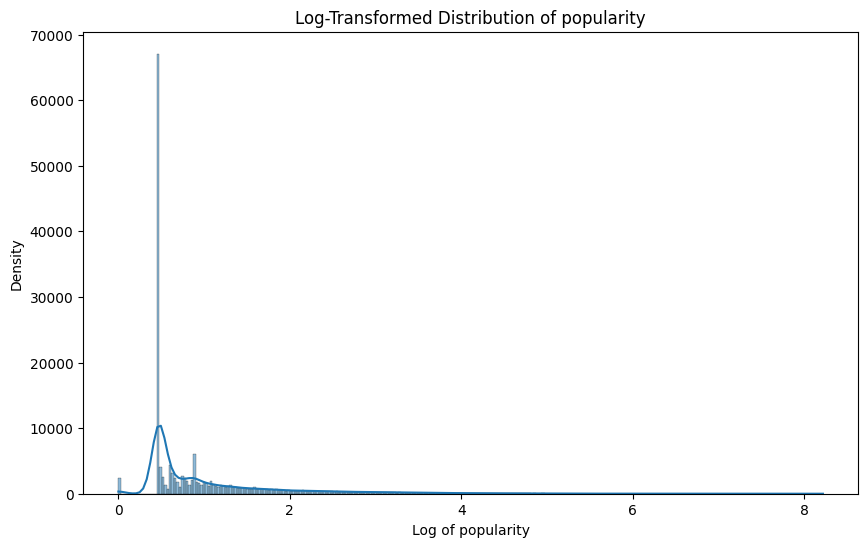

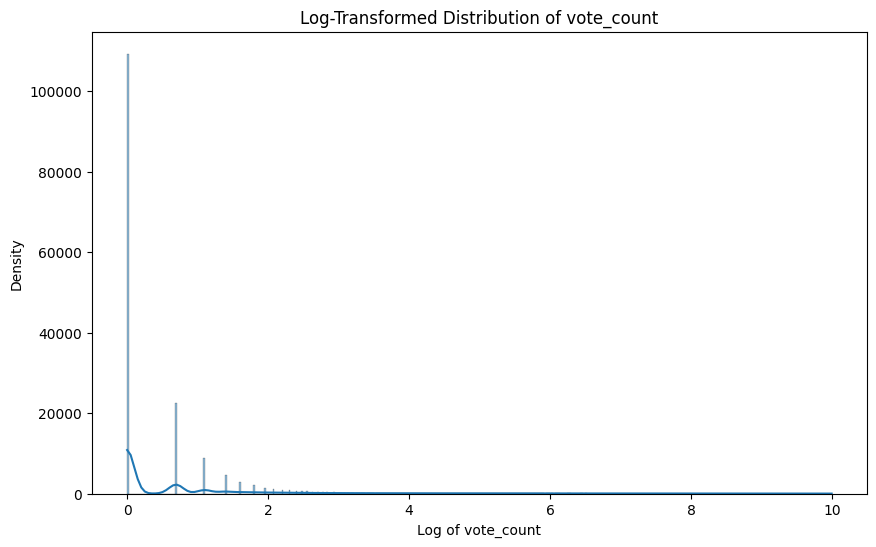

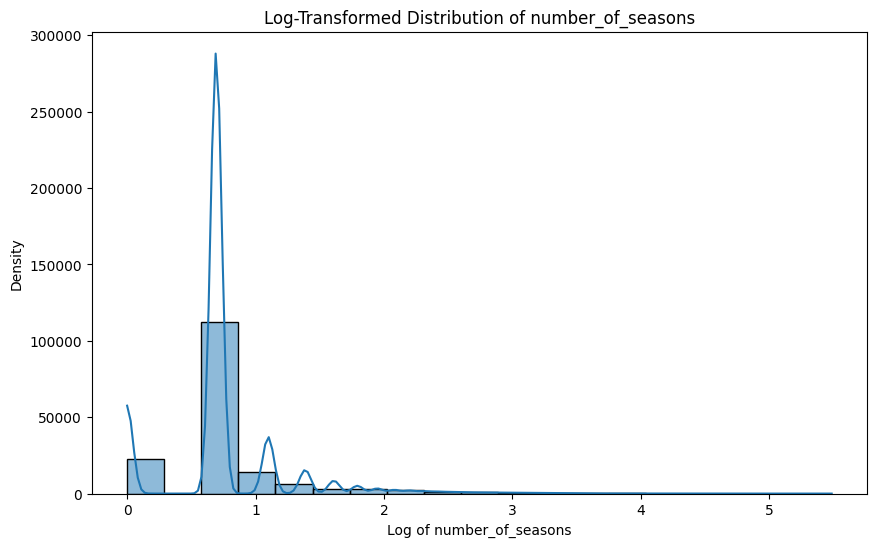

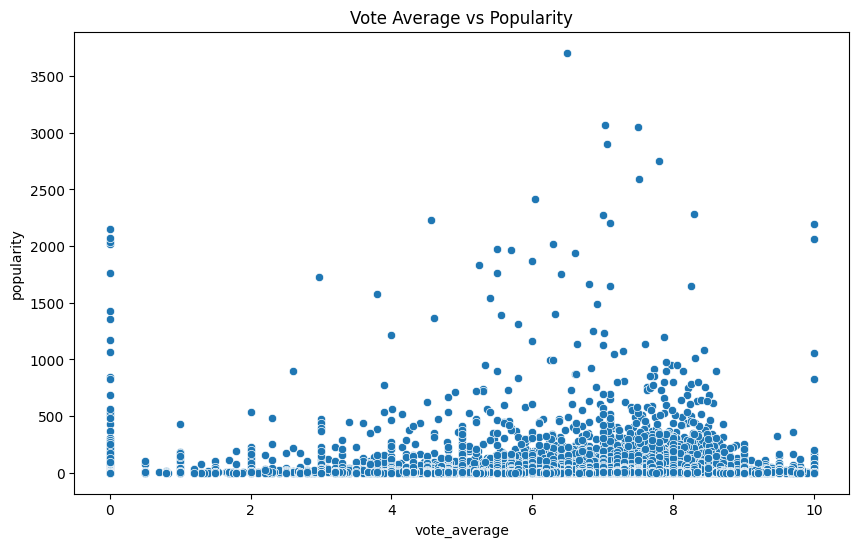

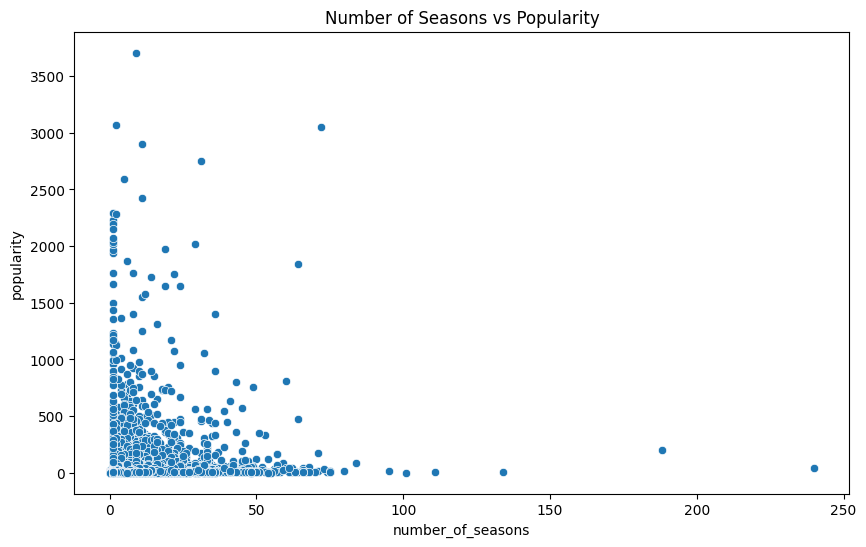

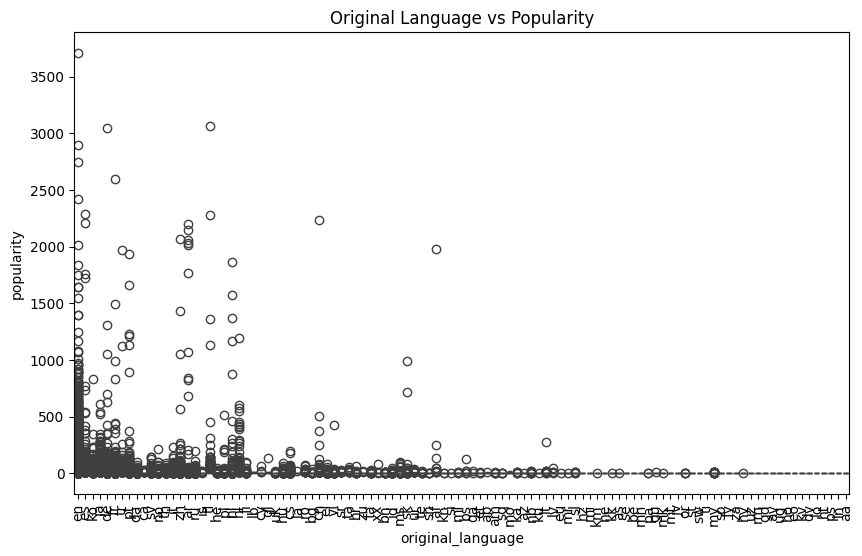

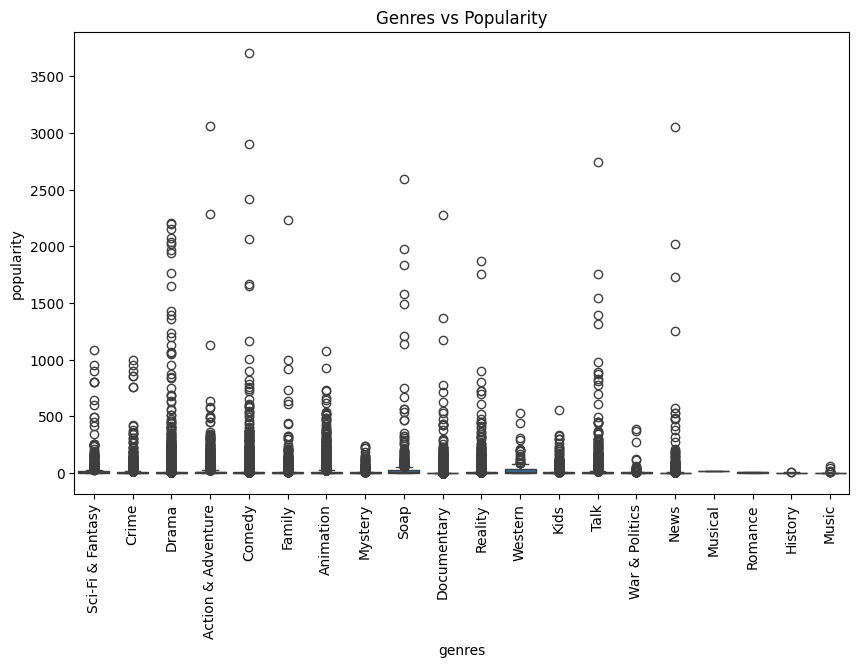

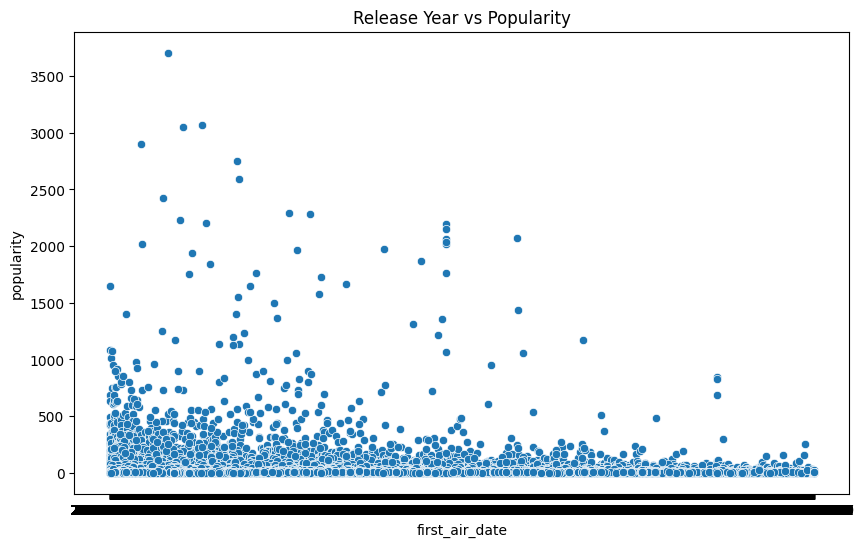

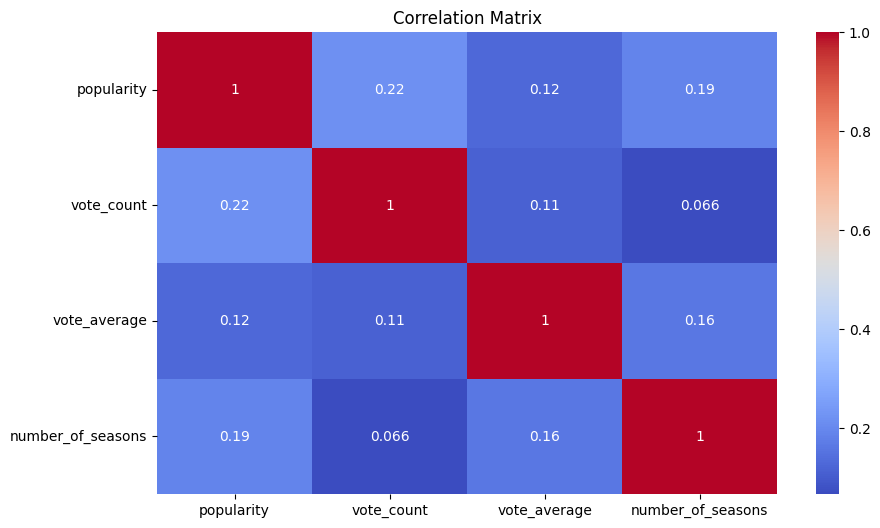

In [ ]:
from PIL import Image
from IPython.display import display

# Open images
image0 = Image.open('/content/drive/MyDrive/Team_DirecTV_1B/Milestone_2_analysis_graphs/data_analysis_0.png')
image1 = Image.open('/content/drive/MyDrive/Team_DirecTV_1B/Milestone_2_analysis_graphs/data_analysis_1.png')
image2 = Image.open('/content/drive/MyDrive/Team_DirecTV_1B/Milestone_2_analysis_graphs/data_analysis_2.png')
image3 = Image.open('/content/drive/MyDrive/Team_DirecTV_1B/Milestone_2_analysis_graphs/data_analysis_3.png')
image4 = Image.open('/content/drive/MyDrive/Team_DirecTV_1B/Milestone_2_analysis_graphs/data_analysis_4.png')
image5 = Image.open('/content/drive/MyDrive/Team_DirecTV_1B/Milestone_2_analysis_graphs/data_analysis_5.png')
image6 = Image.open('/content/drive/MyDrive/Team_DirecTV_1B/Milestone_2_analysis_graphs/data_analysis_6.png')
image7 = Image.open('/content/drive/MyDrive/Team_DirecTV_1B/Milestone_2_analysis_graphs/data_analysis_7.png')
image8 = Image.open('/content/drive/MyDrive/Team_DirecTV_1B/Milestone_2_analysis_graphs/data_analysis_8.png')

# Display images in the notebook
display(image0)
display(image1)
display(image2)
display(image3)
display(image4)
display(image5)
display(image6)
display(image7)
display(image8)


#### 1. **Log-Transformed Distribution of Popularity** (First Image):
- The **popularity** distribution after log transformation still shows a significant peak at lower values, though now the long tail of highly popular TV shows is more apparent.
- Most TV shows cluster around very low popularity, with a few rare shows having much higher popularity.
- The log transformation has spread out the higher-end values, making it easier to interpret than the non-log-transformed graph.

#### 2. **Log-Transformed Distribution of Vote Count** (Second Image):
- Similar to the popularity distribution, the **vote count** is highly right-skewed, with most shows receiving very few votes.
- The log transformation highlights this trend while also spreading out the higher vote counts. This makes the distribution more interpretable for shows with a significant number of votes.
- The peaks along the log scale suggest that there are more "breakpoints" where vote counts tend to cluster at specific intervals.

#### 3. **Log-Transformed Distribution of Number of Seasons** (Third Image):
- This graph shows that the **number of seasons** for most TV shows is concentrated at the lower end, typically between 1 and 2 seasons.
- A few outliers have many seasons, though they are relatively rare. This distribution is also right-skewed, but the log transformation compresses the higher values, making it easier to analyze.
- The sharp peak at 1 season indicates that most TV shows don’t continue for multiple seasons.

#### 4. **Vote Average vs Popularity** (Fourth Image):
- There is no clear linear correlation between **vote average** and **popularity**.
- Many shows have low popularity regardless of their vote average, indicating that good ratings don’t always lead to high popularity.
- A few shows with higher popularity also have higher vote averages, though these are scattered and don't form a clear trend.
- A dense cluster of shows is present around the lower vote average and low popularity region, showing that many TV shows fail to gather both votes and popularity.

#### 5. **Number of Seasons vs Popularity** (Fifth Image):
- This plot shows that **popularity** decreases as the **number of seasons** increases.
- There are many shows with fewer seasons (under 10), but very few have more than 50 seasons.
- The most popular shows seem to cluster around 1-10 seasons, indicating that long-running shows are not necessarily the most popular ones.
- Outliers with more than 100 seasons have lower popularity, potentially indicating niche, long-running series with smaller but loyal audiences.

#### 6. **Original Language vs Popularity** (Sixth Image):
- The scatter plot shows a clear domination of English-language TV shows in terms of **popularity**.
- There are also some outliers from other languages that are highly popular, though they are far fewer compared to English shows.
- The long tail of less popular shows in various languages reflects the lower global reach of non-English productions.
- There is wide variability in the popularity of English shows, while other languages tend to cluster around lower popularity values.

#### 7. **Genres vs Popularity** (Seventh Image):
- This box plot shows how **popularity** varies across different **genres**.
- Genres like **Drama**, **Action & Adventure**, and **Comedy** seem to have higher peaks in popularity, indicating that these genres are generally more popular.
- However, there is significant variability within each genre, with outliers in all categories.
- **Soap** and **Documentary** genres, for instance, show lower overall popularity, but some shows in these genres have standout popularity values.

#### 8. **Release Year vs Popularity** (Eighth Image):
- The scatter plot suggests that **popularity** tends to be higher for more recent shows, though there are many less popular shows across all release years.
- There is no clear upward or downward trend over time, but the highest popularity values cluster more around recent years.
- This makes sense given the larger viewing audiences and global reach of shows released in the streaming era.

#### 9. **Correlation Matrix** (Ninth Image):
- The correlation matrix shows moderate positive correlations between **popularity** and **vote count** (0.22), suggesting that shows with more votes tend to be more popular.
- The correlation between **number of seasons** and **popularity** is weaker (0.19), indicating that longer-running shows don’t necessarily become more popular.
- **Vote average** has a weak correlation with **popularity** (0.12), reinforcing that higher average ratings don’t necessarily result in higher popularity.
- Overall, popularity seems to be more driven by factors like vote count rather than vote quality or the length of the show.

#### Summary:
- **Popularity**: Most shows are low in popularity, with a few high-outlier shows driving the distribution.
- **Vote Count**: Shows that gather a lot of votes tend to also have higher popularity, but the majority of shows don't receive many votes.
- **Number of Seasons**: Shorter TV series (1-2 seasons) dominate, and while there are outliers with many seasons, these tend to have lower popularity.
- **Original Language**: English-language shows dominate in terms of popularity, though there are popular outliers in other languages.
- **Genres**: Drama, Comedy, and Action & Adventure are consistently popular, while niche genres like Soap and Documentary have a mix of lower popularity with a few outliers.
- **Release Year**: Popular shows tend to cluster more in recent years, though there are popular shows from older periods as well.

These analyses offer insights into how different factors—like genre, vote count, and seasons—affect the popularity of TV shows. Let me know if you need further details or adjustments!

# Recommended Steps for Each Milestone Task:

# Milestone 3: Exploratory Data Analysis

The tasks involve exploring and visualizing your dataset to understand patterns, relationships, and key insights that will aid in predicting TV show popularity. Here’s what you can do for each task:

### 1. **Perform detailed EDA to identify key patterns and correlations**
   - **Understand the data types:** Check the data types and ensure that columns like `first_air_date`, `vote_average`, `popularity`, and `genres` are correctly typed.
   - **Descriptive statistics:** Use functions like `.describe()` to get basic statistics (mean, median, mode, standard deviation, etc.) for numeric columns like `popularity`, `vote_average`, and `vote_count`.
   - **Correlation analysis:** Compute pairwise correlations (using `.corr()`) between numerical features like `number_of_seasons`, `vote_count`, and `popularity`. Look for highly correlated variables that might be relevant for prediction.
   - **Categorical feature analysis:** Analyze how features like `genres`, `original_language`, and `production_countries` relate to `popularity`. This can involve checking the frequency distribution of categories and identifying which genres or languages are associated with higher popularity.

### 2. **Visualize data distributions and relationships**
   - **Univariate analysis (distributions):** Create histograms or KDE plots to understand the distribution of key features (e.g., `popularity`, `vote_count`, `number_of_seasons`). Check for skewness and outliers.
   - **Bivariate analysis (relationships):**
     - Use scatter plots to examine relationships between features, such as `vote_average` vs. `popularity` or `number_of_seasons` vs. `popularity`.
     - Box plots can be useful to visualize how categorical variables like `genres` or `original_language` affect `popularity`.
     - Heatmaps of correlation matrices can help visualize which variables have strong correlations with `popularity`.
   - **Multivariate analysis:** If applicable, use pair plots or joint plots to explore relationships between multiple features simultaneously.

### 3. **Generate initial insights and hypotheses for popularity prediction**
   - **Key patterns:** Based on your analysis, document any notable trends. For example, shows with higher `vote_average` and `vote_count` may generally be more popular.
   - **Feature importance hypotheses:** Hypothesize which features might be most important for predicting popularity. For instance, `number_of_seasons`, `genres`, `vote_average`, and `original_language` might be strong predictors.
   - **Anomalies and outliers:** Identify any outliers or anomalies in the data (e.g., shows with very high `popularity` but low `vote_count`) and determine how to handle them in your model.
   - **Feature engineering ideas:** Think about ways to engineer new features, like combining `vote_average` and `vote_count` to create a new metric for show engagement.

For each step, use appropriate visualization libraries like **Matplotlib**, **Seaborn**, or **Plotly** to make your analysis clearer and more insightful. Let me know if you'd like help with specific code examples!

# Milestone 4:  Model Selection and Training

## Select Appropriate ML Models

To select best appropriate ML model, it is crucial to understand the dataset and problem.

Since we are trying to predict the popularity of the shows in relation to the features, it would rather be a regression problem, assuming that the popularity would be a continuous value/score.

Additionally, a lot of the features that directly influence the popularity are numerical data, such as number_of_season, number_of_episodes, vote_count and vote_average, episode_run_time. In this case, it would be helpful to use linear regression or random forest. This would require the categorical data to be one-hot encoded.

It seemed that the features, such as vote average, number of seasons, original language, had linear relationship with the popularity, shown in our EDA; **therefore, linear regression would be a better fit than random forest**.

In [20]:
# numerical features used to predict popularity is found above
print("Numeric columns:")
for num_coln in numeric_columns:
  print(num_coln)

Numeric columns:
number_of_seasons
number_of_episodes
vote_count
vote_average
episode_run_time


In [34]:
# confirm one-hot encoding has been done on the categorical features during the data preprocessing step
categorical_columns = df.select_dtypes(include=['object', 'category']).columns
print("Categorical columns:")
for categ_coln in categorical_columns:
  print(categ_coln)

# one-hot encoding: binary with 0 and 1 only
def confirm_one_hot_encoding(df, coln):
  values_in_column = set(df[coln].unique())
  if (len(values_in_column) != 2):
    return False  # not only two values of 0 and 1
  elif (values_in_column != {0, 1}):
    return False # the two values are not binary (0, 1)
  return True

print("–––––––––––––––––––––––––––––")
print("Confirming one-hot encoding:")
for categ_coln in categorical_columns:
  if (confirm_one_hot_encoding(df_encoded, categ_coln)):
    continue
  else:
    print(f"{categ_coln} has not been one-hot encoded")

Categorical columns:
type
status
created_by
spoken_languages
production_companies
production_countries
–––––––––––––––––––––––––––––
Confirming one-hot encoding:
type has not been one-hot encoded
status has not been one-hot encoded
created_by has not been one-hot encoded
spoken_languages has not been one-hot encoded
production_companies has not been one-hot encoded
production_countries has not been one-hot encoded


In [35]:
# perform one-hot encoding / normalizing again if it has been done
from sklearn.preprocessing import MinMaxScaler, LabelEncoder

def encode_categ_coln(df, coln):
  unique_val = df[coln].nunique()
  if (unique_val <= 15): # assume that the max number of unique values for one-hot encoding is 15
    print(f"{coln} with one-hot encoding")
    df = pd.get_dummies(df, columns=[coln], drop_first=True)
  else:
    print(f"{coln} not applicable for one-hot encoding, applying normalization")
    label_encoder = LabelEncoder()
    df[coln+'_encoded'] = label_encoder.fit_transform(df[coln])
    scaler = MinMaxScaler()
    df[coln+'_normalized'] = scaler.fit_transform(df[[coln+'_encoded']])

    df.drop(columns=[coln, coln+'_encoded'], inplace=True)
  return df

for categ_coln in categorical_columns:
  if (confirm_one_hot_encoding(df, categ_coln)):
    continue
  else:
    df = encode_categ_coln(df, categ_coln)

type with one-hot encoding
status with one-hot encoding
created_by not applicable for one-hot encoding, applying normalization
spoken_languages not applicable for one-hot encoding, applying normalization
production_companies not applicable for one-hot encoding, applying normalization
production_countries not applicable for one-hot encoding, applying normalization


In [38]:
# split data into training and test sets
from sklearn.model_selection import train_test_split

# changed display to show all the columns in one horizontal row, strethc across pages
pd.set_option('display.expand_frame_repr', False)

X = df.drop('popularity', axis=1)
y = df['in_production']

# test_size: 20% of dataset used for test
# random_state: randomly set to be 1234 (must reuse this same seed for same split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1234)

print("X_train:")
print(X_train)
print("X_test:")
print(X_test)
print("y_train:")
print(y_train)
print("y_test:")
print(y_test)

X_train:
        number_of_seasons  number_of_episodes  vote_count  vote_average  in_production  episode_run_time  original_language_ab  original_language_af  original_language_am  original_language_ar  ...  type_Video  status_Ended  status_In Production  status_Pilot  status_Planned  status_Returning Series  created_by_normalized  spoken_languages_normalized  production_companies_normalized  production_countries_normalized
4287             0.004167            0.000288    0.002654          0.62          False          0.004973                 False                 False                 False                 False  ...       False          True                 False         False           False                    False               0.821163                     0.633803                         0.702554                         0.880503
652              0.004167            0.000480    0.029602          0.62          False          0.006631                 False                 False     

## Train initial models using preprocessed data

# Milestone 4 Guidelines
### (1) Select Appropriate ML Models (Evelyn)
- **Linear Regression**: This is a baseline model that assumes a linear relationship between features and popularity.
  - **Actionable steps**:
    - Identify the most important numerical features for prediction (e.g., number of episodes, vote count, vote average, etc.).
    - One-hot encode categorical features (like 'genres' or 'language').
    - Split your data into training and test sets (e.g., 80/20 split).

- **Random Forest**: A more complex, non-linear model that creates an ensemble of decision trees.
  - **Actionable steps**:
    - Ensure feature importance analysis is part of your evaluation.
    - Tune hyperparameters such as `n_estimators` (number of trees), `max_depth` (depth of trees), and `min_samples_split` using grid search or cross-validation.

- **Gradient Boosting**: Another ensemble model but focuses on correcting errors of previous models.
  - **Actionable steps**:
    - Start with default parameters, then perform hyperparameter tuning.
    - Try early stopping if performance does not improve after a certain number of iterations.

### (2) Train Initial Models Using Preprocessed Data (Sharon)
- **Actionable steps**:
  - **(completed in Task 1 to check encoding, so dw about this :D)** Standardize/normalize features if necessary (especially for linear models).
  - **(completed in Task 1, this task is redundant to action steps in Task 1, so dw about this :D)** Use sklearn's `train_test_split` to divide your dataset into training and testing sets.
  - Train each model using the preprocessed data:
- For **Linear Regression**: Use `LinearRegression()` from sklearn.
- For **Random Forest**: Use `RandomForestRegressor()`.
- For **Gradient Boosting**: Use `GradientBoostingRegressor()`.
- Capture training times and basic performance measures (e.g., predictions on the training set).

### (3) Evaluate Model Performance Using Metrics (Hearty & Julissa)
- **Actionable steps**:
  - Calculate **RMSE (Root Mean Squared Error)**, **MAE (Mean Absolute Error)**, and **R-squared** for each model on the test set.
  - Use `mean_squared_error()` for RMSE (with `squared=False` for root version).
  - Use `mean_absolute_error()` for MAE.
  - Use `r2_score()` for R-squared.
  - Compare performance across models and identify which model(s) perform best.
  - Optionally, use cross-validation to ensure results are consistent across different data splits.
